In [101]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.__version__

'1.24.4'

In [3]:
pd.__version__

'2.0.3'

In [102]:
df = pd.read_pickle("objects.pkl")

In [103]:
df

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,34754,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,37219,13391,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,39024,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,37165,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,37201,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654,136847,56133,32,поселок Свень,9,9,63,2032-06-30,3842.25,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN
11655,136842,56128,32,поселок Свень,9,9,98,2024-12-31,6248.34,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN
11656,136843,56129,32,поселок Свень,9,9,103,2026-06-30,6762.46,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN
11657,136844,56130,32,поселок Свень,9,9,110,2027-12-31,7092.53,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN


In [147]:
class ObjectsLoader:
    def __init__(self):
        self.objects_df = None
        self.objects_file = 'objects.pkl'
        self.tabdict = defaultdict(list)

    def get_objects(self):
        self.regions_codes = {
            1: 'Республика Адыгея',
            2: 'Республика Башкортостан',
            3: 'Республика Бурятия',
            4: 'Республика Алтай',
            5: 'Республика Дагестан',
            6: 'Республика Ингушетия',
            7: 'Кабардино-Балкарская Республика',
            8: 'Республика Калмыкия',
            9: 'Карачаево-Черкесская Республика',
            10: 'Республика Карелия',
            11: 'Республика Коми',
            12: 'Республика Марий Эл',
            13: 'Республика Мордовия',
            14: 'Республика Саха (Якутия)',
            15: 'Республика Северная Осетия — Алания',
            16: 'Республика Татарстан (Татарстан)',
            17: 'Республика Тыва',
            18: 'Удмуртская Республика',
            19: 'Республика Хакасия',
            20: 'Чеченская Республика',
            21: 'Чувашия',
            22: 'Алтайский край',
            23: 'Краснодарский край',
            24: 'Красноярский край',
            25: 'Приморский край',
            26: 'Ставропольский край',
            27: 'Хабаровский край',
            28: 'Амурская область',
            29: 'Архангельская область',
            30: 'Астраханская область',
            31: 'Белгородская область',
            32: 'Брянская область',
            33: 'Владимирская область',
            34: 'Волгоградская область',
            35: 'Вологодская область',
            36: 'Воронежская область',
            37: 'Ивановская область',
            38: 'Иркутская область',
            39: 'Калининградская область',
            40: 'Калужская область',
            41: 'Камчатский край',
            42: 'Кемеровская область',
            43: 'Кировская область',
            44: 'Костромская область',
            45: 'Курганская область',
            46: 'Курская область',
            47: 'Ленинградская область',
            48: 'Липецкая область',
            49: 'Магаданская область',
            50: 'Московская область',
            51: 'Мурманская область',
            52: 'Нижегородская область',
            53: 'Новгородская область',
            54: 'Новосибирская область',
            55: 'Омская область',
            56: 'Оренбургская область',
            57: 'Орловская область',
            58: 'Пензенская область',
            59: 'Пермский край',
            60: 'Псковская область',
            61: 'Ростовская область',
            62: 'Рязанская область',
            63: 'Самарская область',
            64: 'Саратовская область',
            65: 'Сахалинская область',
            66: 'Свердловская область',
            67: 'Смоленская область',
            68: 'Тамбовская область',
            69: 'Тверская область',
            70: 'Томская область',
            71: 'Тульская область',
            72: 'Тюменская область',
            73: 'Ульяновская область',
            74: 'Челябинская область',
            75: 'Забайкальский край',
            76: 'Ярославская область',
            77: 'Москва',
            78: 'Санкт-Петербург',
            79: 'Еврейская автономная область',
            80: 'Забайкальский край',
            81: 'Пермский край',
            82: 'Республика Крым',
            83: 'Ненецкий автономный округ',
            84: 'Херсонская область',
            85: 'Запорожская область',
            86: 'Ханты-Мансийский автономный округ',
            87: 'Чукотский автономный округ',
            88: 'Республика Адыгея',
            89: 'Ямало-Ненецкий автономный округ',
            90: 'Московская область',
            91: 'Калининградская область',
            92: 'Севастополь',
            93: 'Краснодарский край'
        }
        self.objects_df = pd.read_pickle(self.objects_file)
        for index, row in self.objects_df.iterrows():
            self.tabdict['hobjId'].append(row['hobjId'])
            self.tabdict['objId'].append(row['objId'])
            self.tabdict['код_региона'].append(row['rpdRegionCd'])
            self.tabdict['регион'].append(self.regions_codes[row['rpdRegionCd']])
            self.tabdict['адрес'].append(row['objAddr'])
            self.tabdict['минимум_этажей'].append(row['objFloorMin'])
            self.tabdict['максимум_этажей'].append(row['objFloorMax'])
            self.tabdict['количество_квартир'].append(row['objElemLivingCnt'])
            self.tabdict['ввод_в_эксплуатацию'].append(row['objReady100PercDt'])
            self.tabdict['жилая_площадь'].append(row['objSquareLiving'])
            self.tabdict['широта'].append(row['latitude'])
            self.tabdict['долгота'].append(row['longitude'])
            self.tabdict['статус'].append(row['siteStatus'])
            self.tabdict['цена_метра'].append(row['objPriceAVG'])
        print('объекты собраны в словарь')

    def make_objects_dataframe(self):
        print('Создан DataFrame')
        self.df = pd.DataFrame(self.tabdict)
        self.df['код_региона'] = self.df['код_региона'].replace([93, 91, 90, 88], [23, 39, 50, 1])
        return self.df

    def get_df_with_objects(self):
        self.get_objects()
        self.objects_df = self.make_objects_dataframe()
        return self.objects_df

    def all_objects_price_on_catplot(self):
        self.get_df_with_objects()
        print('Все объекты всех регионов со стоимостями квадратного метра')
        sns.set(style="ticks", color_codes=True)
        sns.catplot(
            x='цена_метра',
            y='регион',
            data=self.objects_df,
            jitter=0.1,
            height=18,
            aspect=2,
            kind='strip',
            dodge=True)

    def all_on_heatmap(self):
        self.get_df_with_objects()
        print('Объемы вводимого жилья по регионам и годам')
        self.objects_df['Год_ввода'] = self.objects_df.apply(lambda x: int(x['ввод_в_эксплуатацию'].split('-')[0]), axis=1)
        self.df_sum_square = self.objects_df.groupby(['регион', 'Год_ввода']).agg({'жилая_площадь': ['sum']}).unstack()
        plt.figure(figsize=(30, 30))
        sns.heatmap(self.df_sum_square, center=0, cmap='mako', annot=True)
        plt.show()
    
    def mean_price(self):
        df_mean_price = self.get_df_with_objects().groupby('регион').agg({'цена_метра': ['mean'],'широта': ['mean'],'долгота': ['mean']}). reset_index()
        print('Средняя стоимость квадратного мтра по регионам')
        df_mean_price.plot(x='регион', y='цена_метра', kind='bar', figsize=(16 , 6))

        


In [148]:
obj_loader = ObjectsLoader()

In [142]:
df = obj_loader.get_df_with_objects()
df

объекты собраны в словарь
Создан DataFrame


,hobjId,objId,код_региона,регион,адрес,минимум_этажей,максимум_этажей,количество_квартир,ввод_в_эксплуатацию,жилая_площадь,широта,долгота,статус,цена_метра
0,34754,13399,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,57.1519,65.5544,Строящиеся,50768.0
1,37219,13391,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,57.1541,65.5595,Строящиеся,62638.0
2,39024,13383,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,57.1519,65.5536,Строящиеся,66773.0
3,37165,13398,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,57.1519,65.5544,Строящиеся,47886.0
4,37201,13397,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,57.1519,65.5544,Строящиеся,47163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654,136847,56133,32,Брянская область,поселок Свень,9,9,63,2032-06-30,3842.25,53.2159,34.4496,Строящиеся,NaN
11655,136842,56128,32,Брянская область,поселок Свень,9,9,98,2024-12-31,6248.34,53.1385,34.3635,Строящиеся,NaN
11656,136843,56129,32,Брянская область,поселок Свень,9,9,103,2026-06-30,6762.46,53.2163,34.4503,Строящиеся,NaN
11657,136844,56130,32,Брянская область,поселок Свень,9,9,110,2027-12-31,7092.53,53.2161,34.4494,Строящиеся,NaN


In [143]:
df.dtypes

hobjId                   int64
objId                    int64
код_региона              int64
регион                  object
адрес                   object
минимум_этажей           int64
максимум_этажей          int64
количество_квартир       int64
ввод_в_эксплуатацию     object
жилая_площадь          float64
широта                 float64
долгота                float64
статус                  object
цена_метра             float64
dtype: object

объекты собраны в словарь
Создан DataFrame
Объемы вводимого жилья по регионам и годам


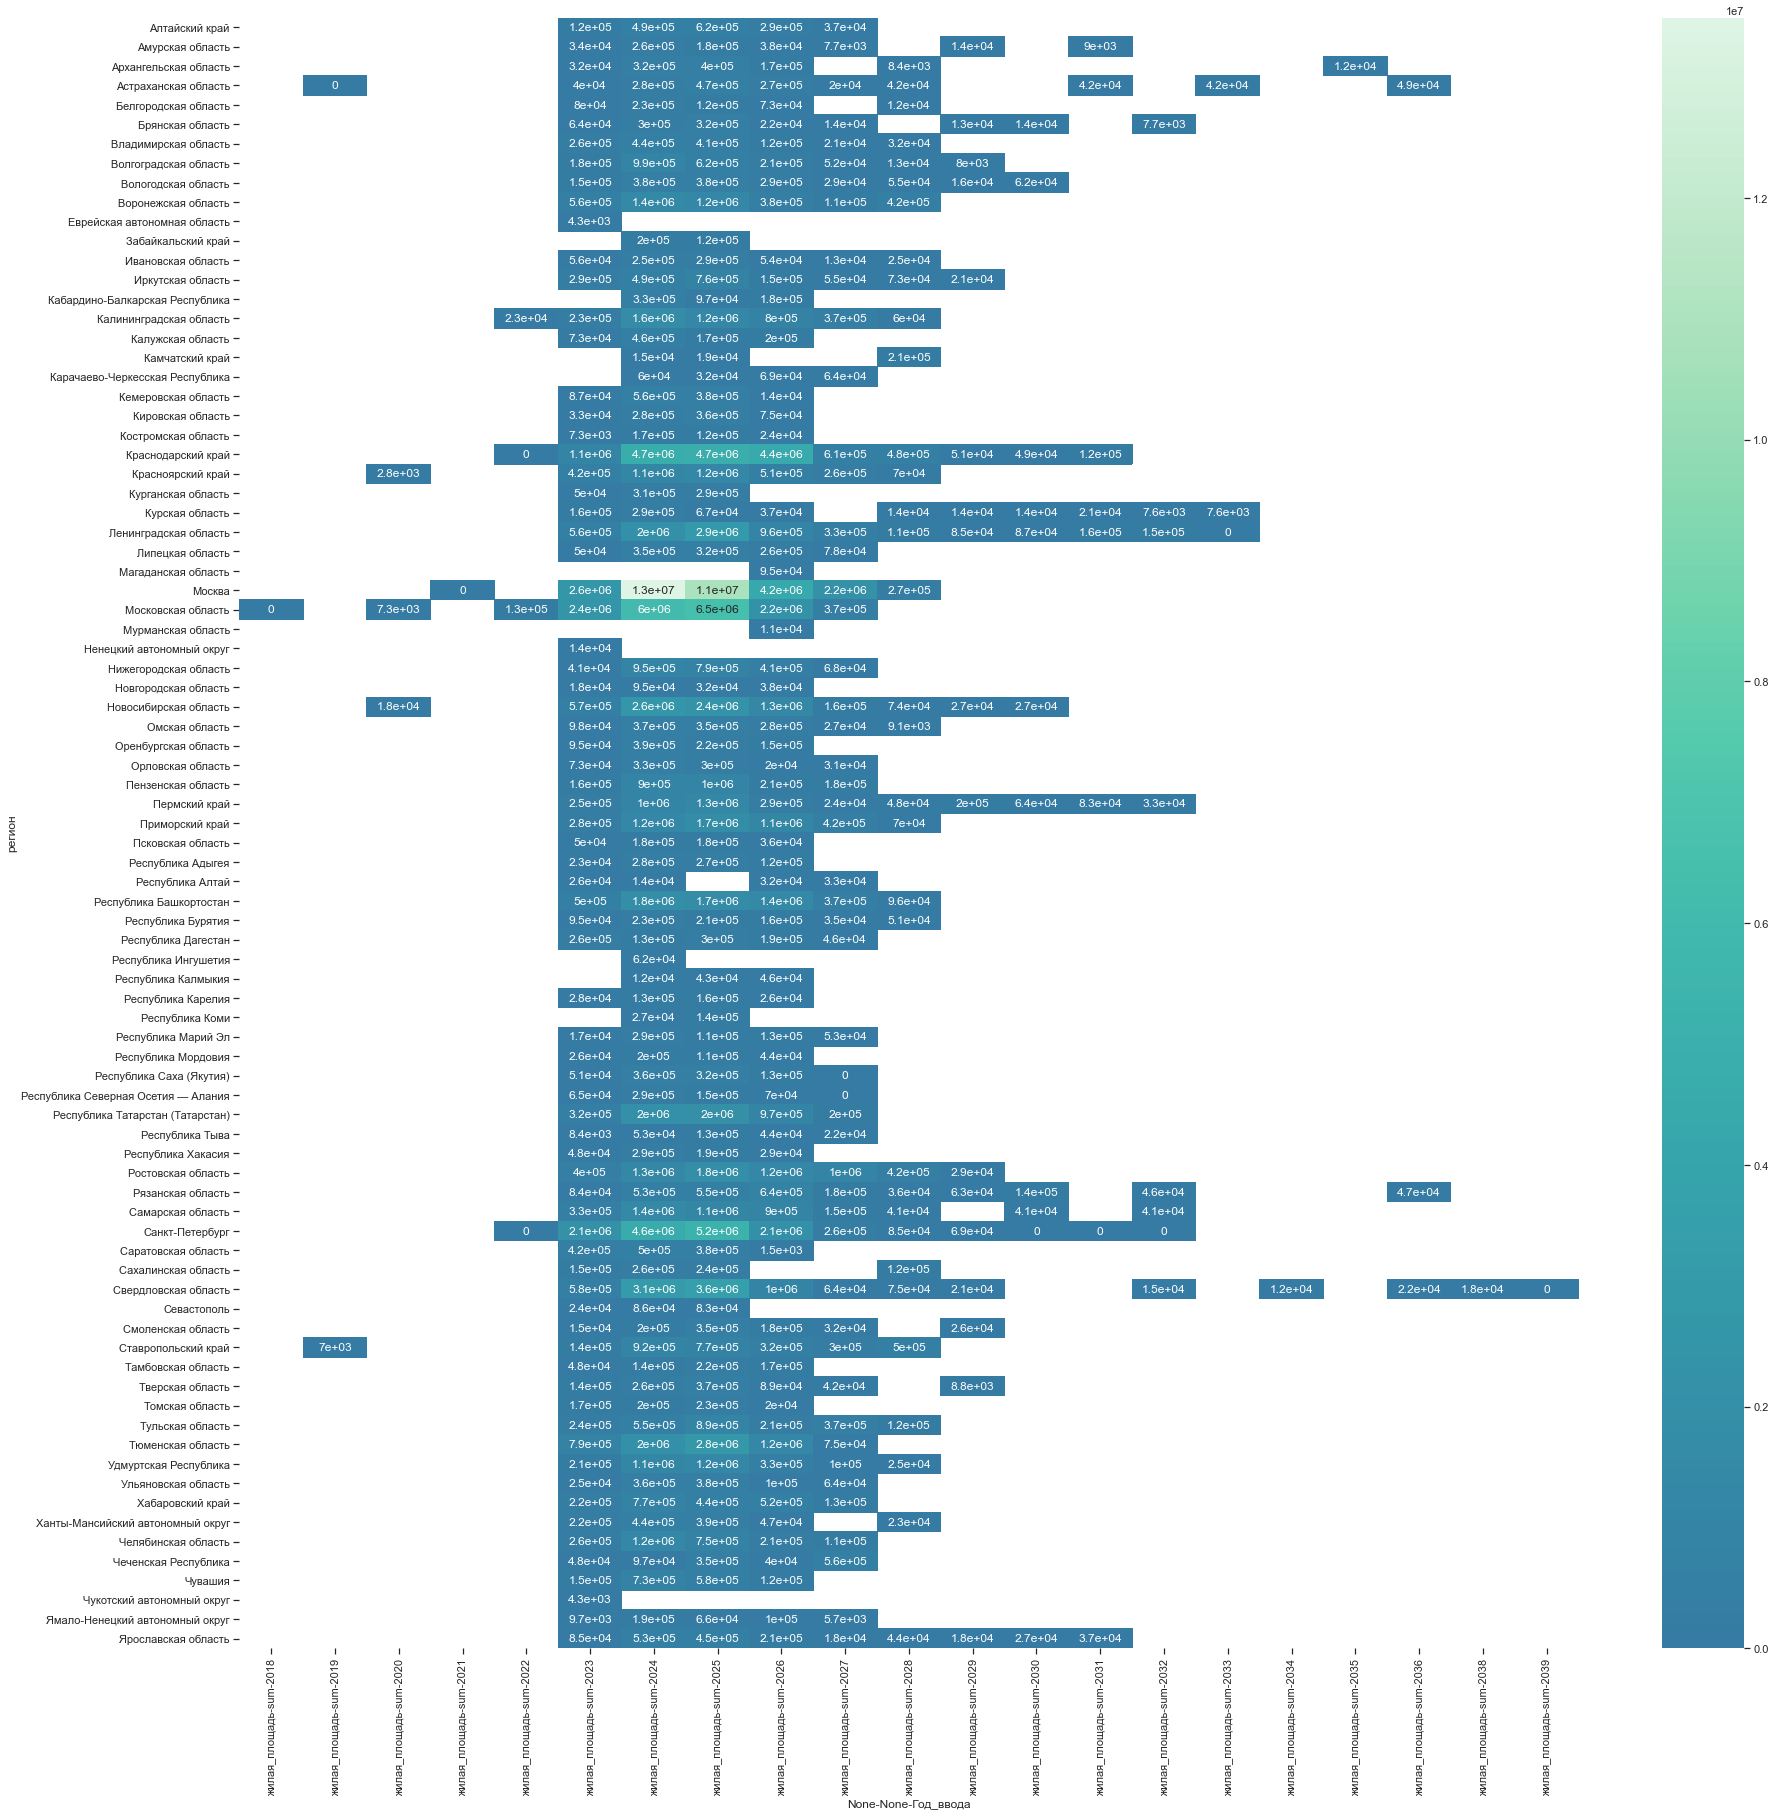

In [144]:
obj_loader.all_on_heatmap()

объекты собраны в словарь
Создан DataFrame
Все объекты всех регионов со стоимостями квадратного метра


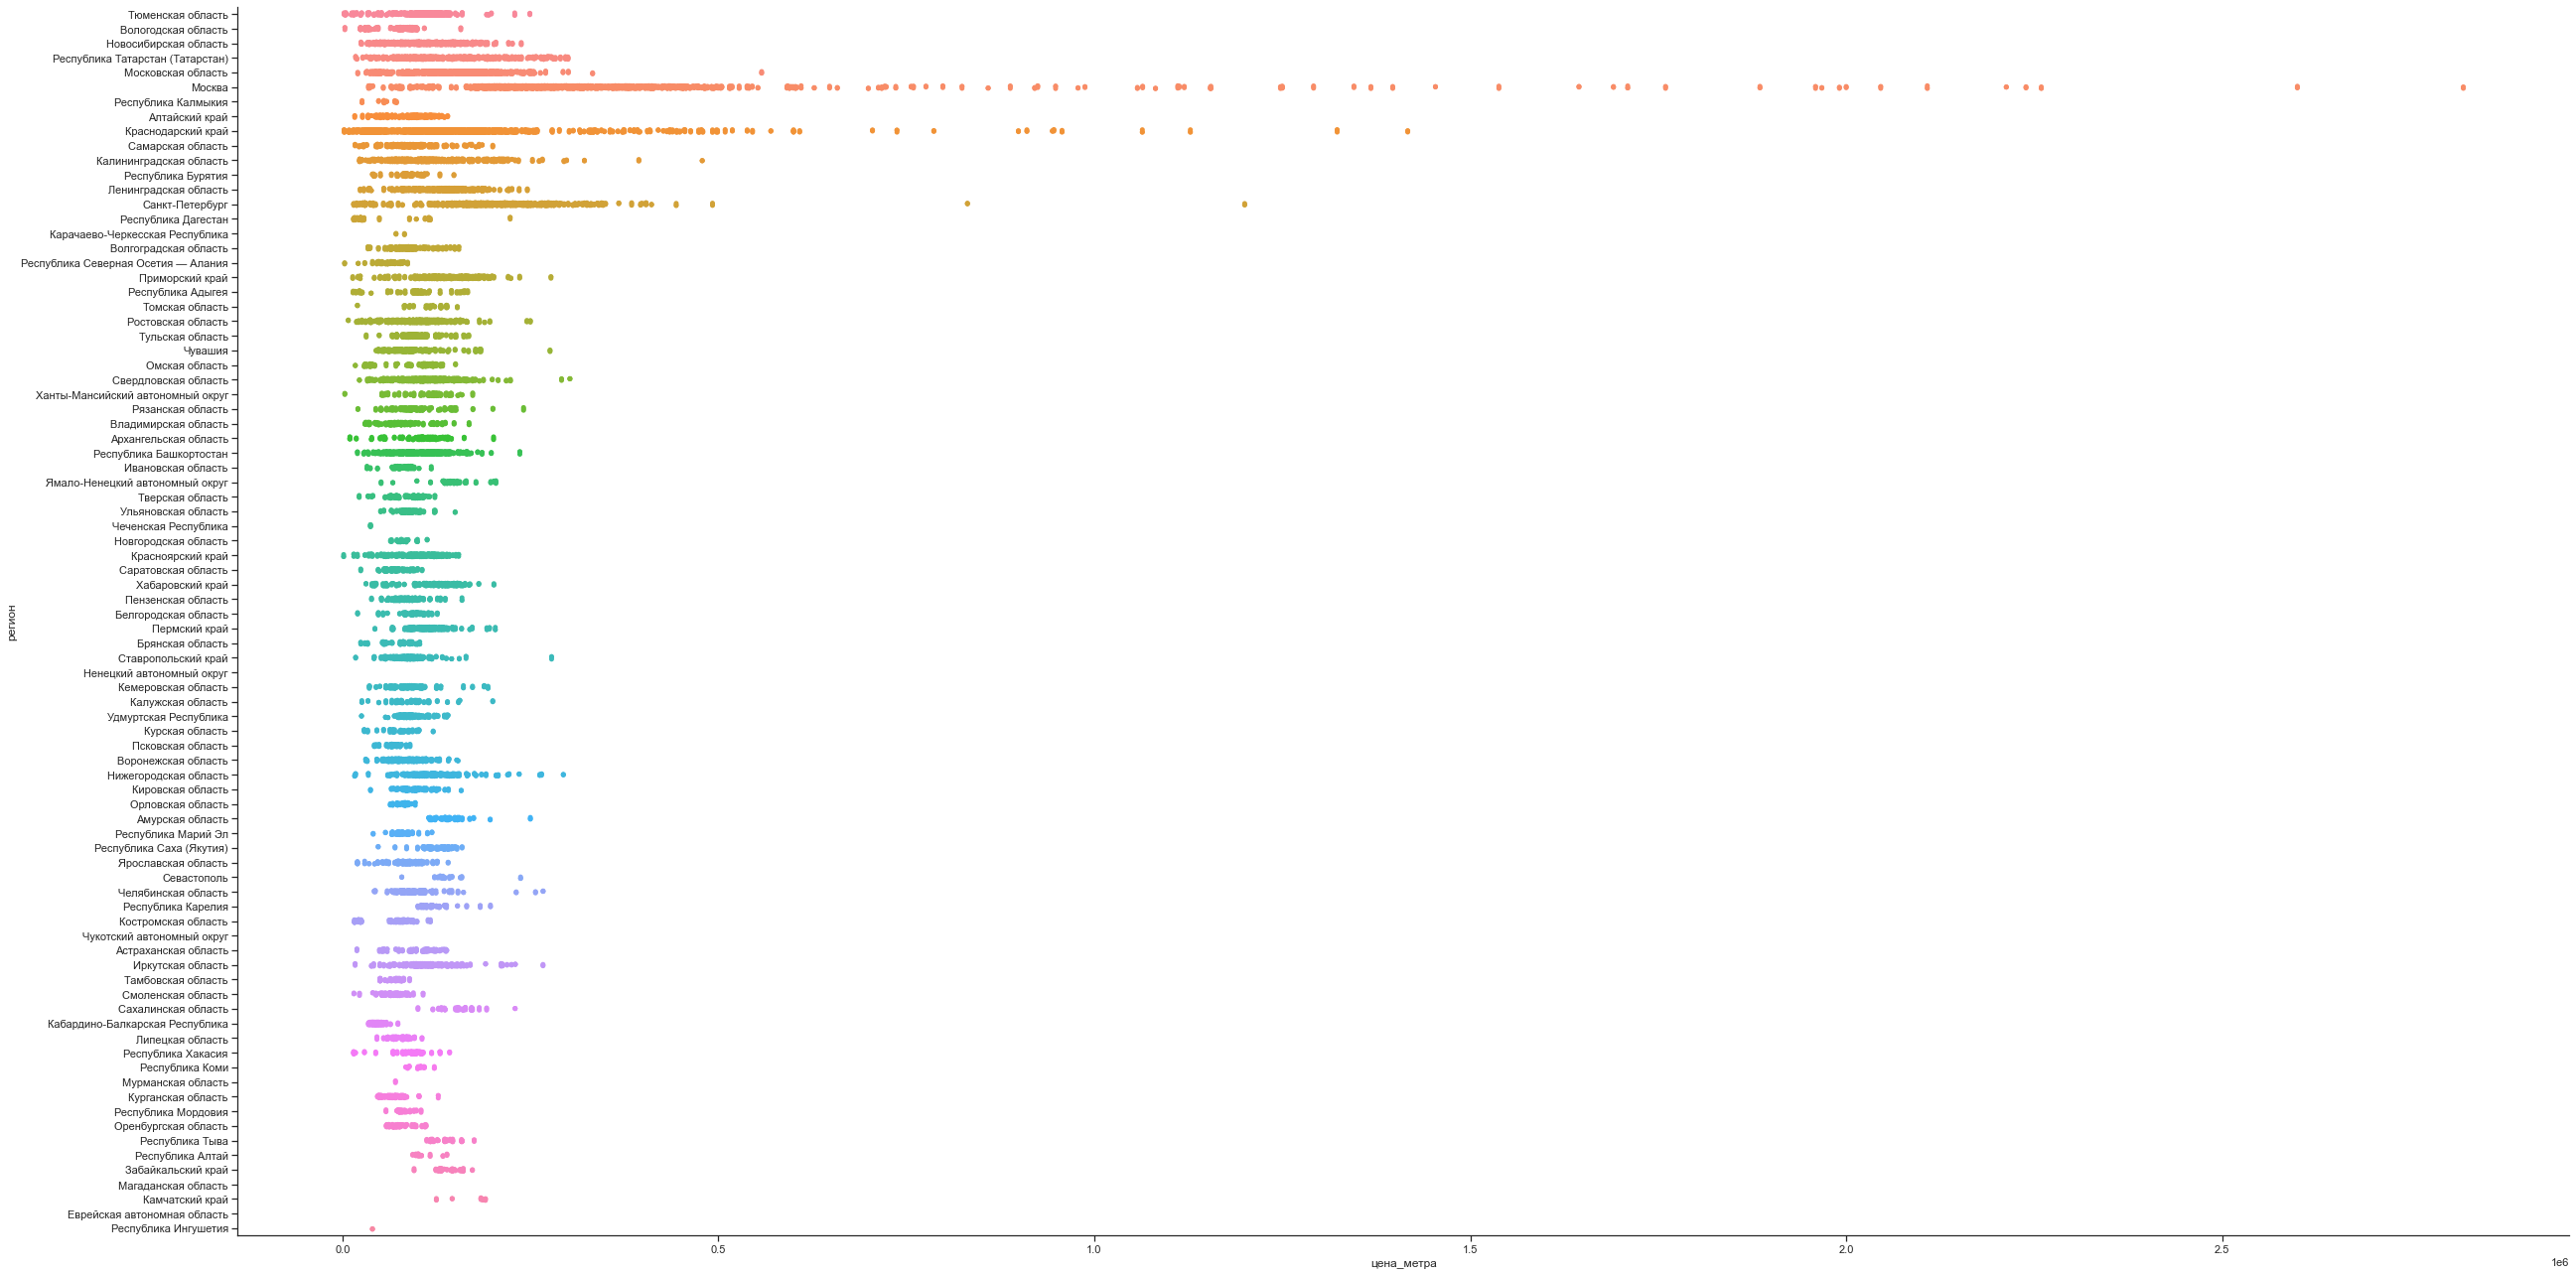

In [145]:
obj_loader.all_objects_price_on_catplot()

объекты собраны в словарь
Создан DataFrame
Средняя стоимость квадратного мтра по регионам


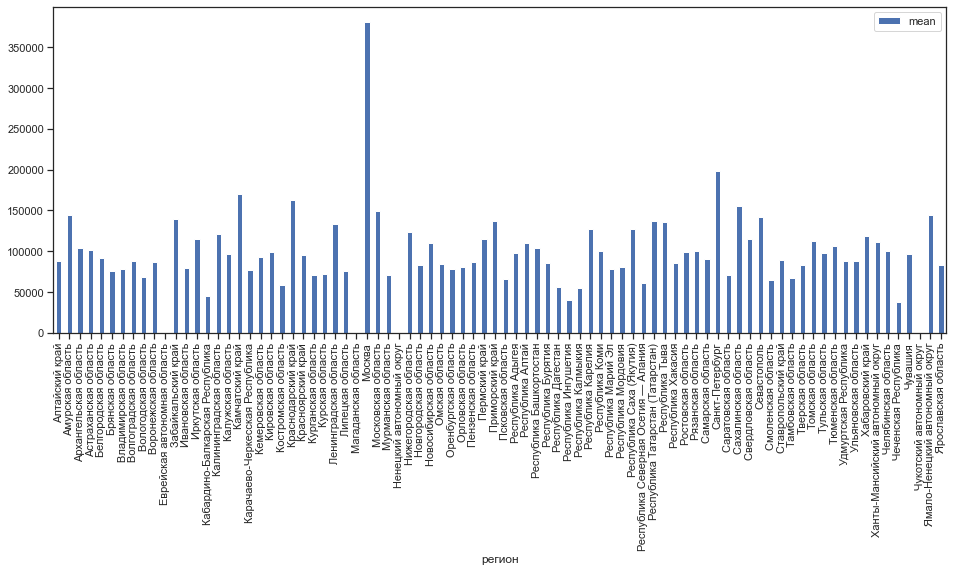

In [149]:
obj_loader.mean_price()